# ✅ all()

```
all(iterable)
```



## 📌 تعریف

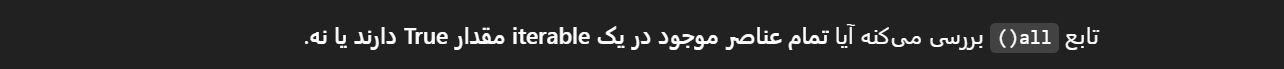

## 📙 قوانین مهم

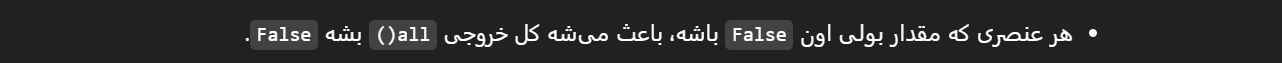

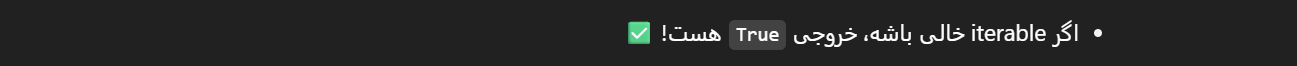

## ✅ for معادل ساده‌تر با

In [ ]:
def my_all(iterable):
  for item in iteravble:
    if not item:
      return False
  return True

## 🔍 مثال‌های پایه



```
all([True, True, True])          # ✅ True
all([True, False, True])         # ❌ False
all([1, 2, 3, -5])               # ✅ True
all([1, 0, 3])                   # ❌ False (چون 0 == False)
all([])                          # ✅ True (مجموعه خالی یعنی مشکلی پیدا نشد!)

```



## ✅ ترکیب با لیست‌های شرطی

In [5]:
numbers = [3, 5, 7, 9]

print(all(numbers))                 # => all(x for x in numbers)
print(all(x>0 for x in numbers))

numbers = [3, -5, 7, 9]
print(all(x for x in numbers))      # => all(numbers)
print(all(x>0 for x in numbers))


True
True
True
False


##  چطور کار می‌کنه all() : پشت‌پرده

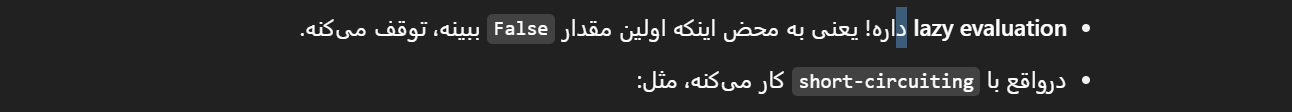

 ## 📦 کاربرد واقعی در پروژه‌ها

### ✅ اعتبارسنجی فرم

In [6]:
fields = ["iman", "hamid", "Ali"]
if all(fields): print("Done")

Done


### ✅ چک کردن شرایط خاص

In [12]:
fields = ["iman", "hamid", "Ali"]
if all(field.istitle() for field in fields):
  print("done")
else:
  print("case Error!")

case Error!


In [ ]:
# def all_is_even(l: list[int])->bool:
#   for el in l:
#     if el % 2 == 0:
#       return False
#   return True
def all_is_even(l: list[int])->bool:
  return all(el % 2 == 0 for el in l)

# ✅ any()

```
any(iterable)
```



## 📙 تعریف

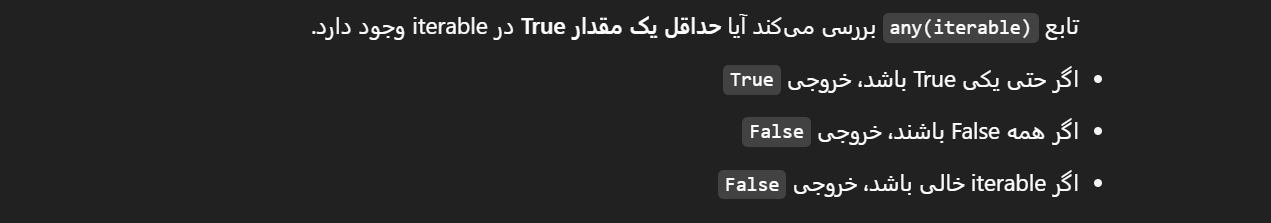

## ✅ for معادل ساده‌تر با

In [ ]:
def my_any(iterable)->bool:
  for item in iterable:
    if item:
      return True
  return False

## 🔍 مثال‌های پایه



```
any([0, 0, 3])    # ✅ True (چون 3 معادل True است)
any([0, "", None])# ❌ False (هیچ True نیست)
any([])           # ❌ False

```



## 💡 all() تفاوت با

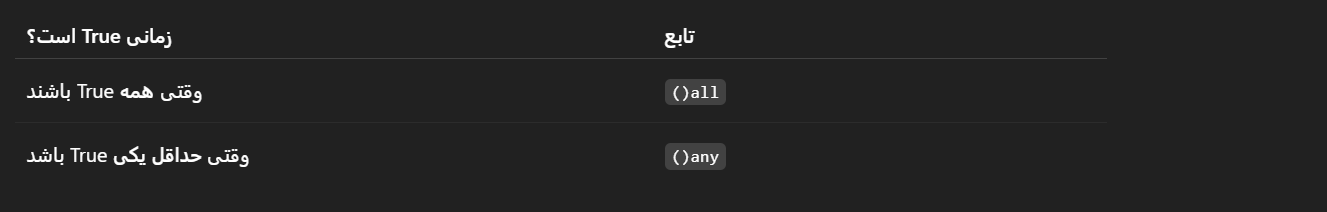

📘 شناسایی آبجکت‌ها  و مدیریت تکرار

# 📘  1.1: id()

```
id(obj)
```



## 📝 1.1 تعریف و عملکرد

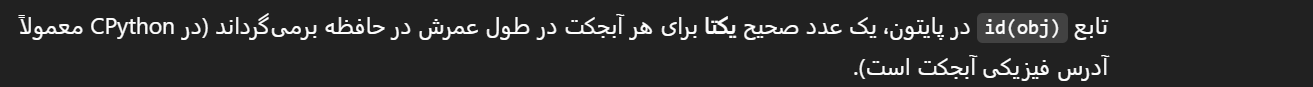

### 📋 کاربردهای اصلی

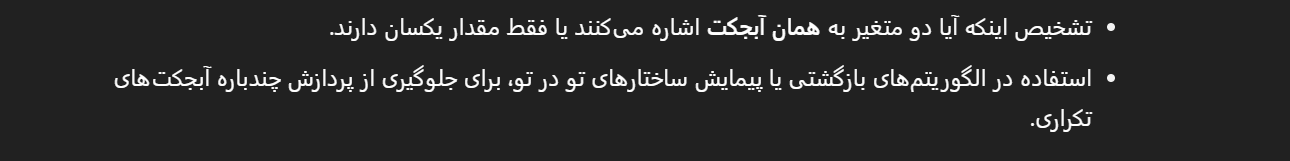

### 🧩 مثال 1

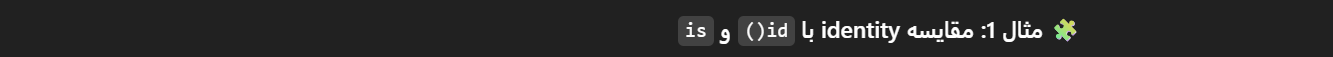

In [22]:
a = [1, 2, 3]
b = a
c = [1, 2, 3]

print(id(a) == id(b))  # ✅ True: هر دو دقیقاً یک آبجکت هستند
print(id(a) == id(c))  # ❌ False: مقدار برابر ولی آبجکت جدا
print(a is b)          # ✅ True
print(a is c)          # ❌ False
print(a == c)          # ✅ True: مقدارها برابر


True
False
True
False
True


# 📘  1.2: seen

## 📝 مفهوم و کاربرد

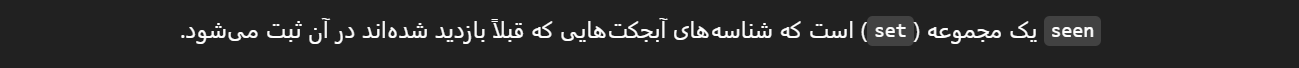

### 📋 کاربردهای اصلی

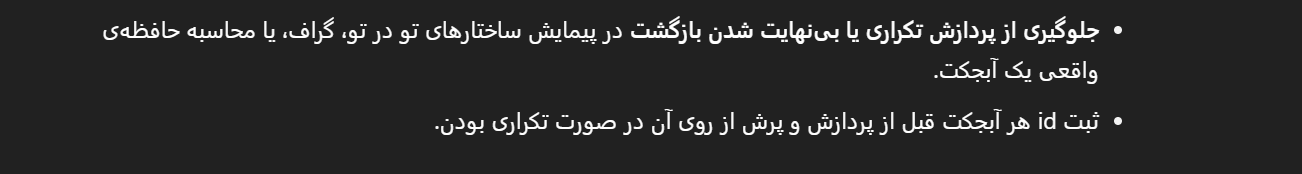

### 🧩 مثال 2

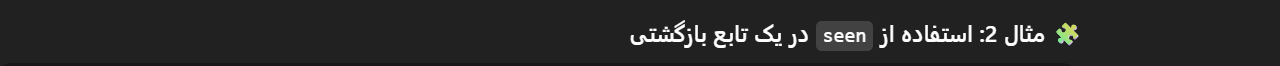

In [ ]:
def visit(obj, seen=None):
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        print("Already seen this object, skipping!")
        return
    seen.add(obj_id)
    # ادامه‌ی پردازش obj



## 🛠️ [PRACTICE]

### 🏷️ تمرین 1

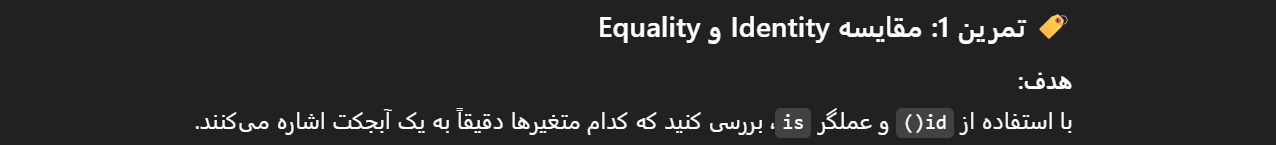

In [ ]:
a = [1, 2, 3]
b = a
c = [1, 2, 3]

# خروجی‌های زیر را با توضیح بنویس:
print(id(a) == id(b))  # ؟
print(id(a) == id(c))  # ؟
print(a is b)          # ؟
print(a is c)          # ؟
print(a == c)          # ؟


### 🏷️ تمرین 2

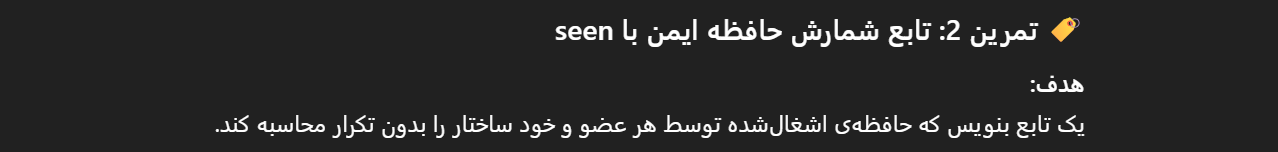

In [39]:
# version 1: witout monitoring objects
import sys
col_size = 0
def total_size(x)->int:
  global col_size
  col_size += sys.getsizeof(x)
  if type(x) in (tuple, list, set):
    for el in x:
      total_size(el)
  return col_size
n1 = tuple(i for i in range(100))
n2 = (1,2,1,(1,2), (3,2), (3,2))
print(total_size(n1))
print(total_size(n2))


3640
4148


In [43]:
# version 2: with ERROR on monitoring of objects

def visited(obj, seen=None):
  if seen == None:
    seen = set()
  if id(obj) in seen:
    print(obj)
    return False
  seen.add(id(obj))
  return True
def total_size(x, col_size = 0)->int:
  if visited(x):
    col_size += sys.getsizeof(x)
  if type(x) in (tuple, list, set):
    for el in x:
      col_size += total_size(el)
  return col_size

n1 = tuple(i for i in range(100))
n2 = (1,2,1,(1,2), (3,2), (3,2))
print(total_size(n1))
print(total_size(n2))

3640
508


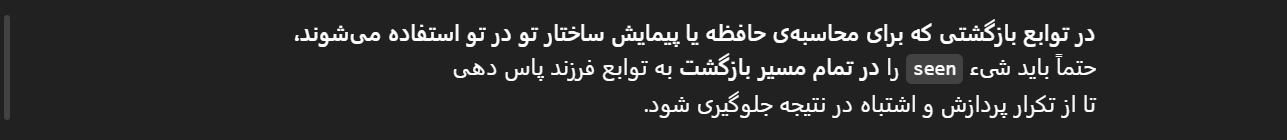

In [45]:
# third version: with exact monitoring on objects
def total_size(x, seen = None)->int:
  col_size = 0
  if seen == None:
    seen = set()
  if id(x) in seen:
    print(f"{x} already exist")
    return 0
  seen.add(id(x))
  col_size += sys.getsizeof(x)
  if type(x) in (tuple, list, set):
    for el in x:
      col_size += total_size(el, seen)
  return col_size

n1 = tuple(i for i in range(100))
n2 = (1,2,1,(1,2), (3,2), (3,2))
print(total_size(n1))
print(total_size(n2))

3640
1 already exist
1 already exist
2 already exist
2 already exist
(3, 2) already exist
284


In [34]:
# chatgpt version:
import sys
def total_size(obj, seen=None):
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    seen.add(obj_id)
    size = sys.getsizeof(obj)
    if isinstance(obj, (tuple, list, set)):
        size += sum(total_size(x, seen) for x in obj)
    elif isinstance(obj, dict):
        size += sum(total_size(k, seen) + total_size(v, seen) for k, v in obj.items())
    return size
n1 = tuple(i for i in range(100))
n2 = (1,2,1,(1,2), (3,2), (3,2))
print(total_size(n1))
print(total_size(n2))

3640
284


### 🏷️ تمرین 3: جمع کردن اعضای صحیح منحصربه‌فرد

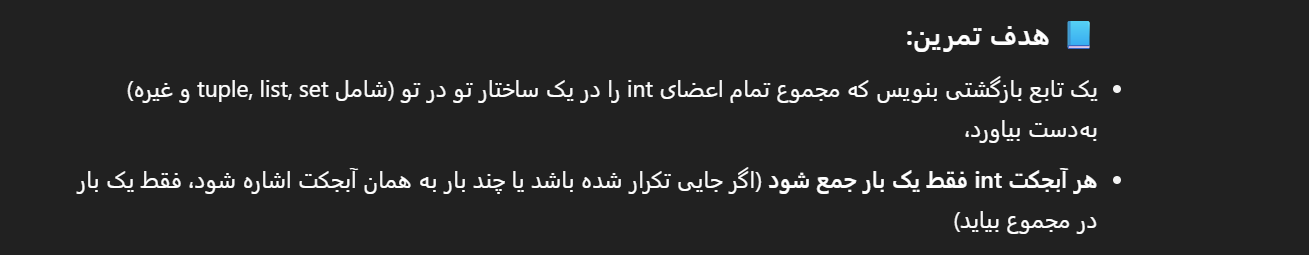

In [58]:
def sum_unique_ints(obj, seen=None):
  somma = 0
  if seen == None:
    seen = set()
  obj_id=id(obj)
  if obj_id in seen:
    return 0
  seen.add(obj_id)
  if isinstance(obj, (tuple, set, list)):
    somma += sum(sum_unique_ints(el, seen) for el in obj)
  elif isinstance(obj, (dict)):
    somma +=sum(sum_unique_ints(value, seen) for value in obj.values())
  elif type(obj) == int:
    somma += obj
  return somma

In [59]:
# testing:
n = (1, 2, 1, (1, 2), (3, 2), (3, 2))
print(sum_unique_ints(n))   # خروجی: 6 (1+2+3 فقط یک بار جمع می‌شود)

a = 100
lst = [a, (a, [a, a]), 2, 3, 2]
print(sum_unique_ints(lst))   # خروجی: 105 (100+2+3)

s = ({1, 2}, (3, 4, 1), 2, 3)
print(sum_unique_ints(s))   # خروجی: 10 (1+2+3+4)

d = {1: 10, 2: [10, 2], 3: {3, 1}}
print(sum_unique_ints(d))   # خروجی: 16 (1+2+3+10)

# int, float, str, bool
print(sum_unique_ints([1, 2.5, "3", True, False]))  # خروجی: 1 (فقط int)

# تو در تو با انواع مختلف
data = ([1, 2.0, "5", False], (3, 2, 2.0), {4, 1, True, "6"})
print(sum_unique_ints(data))  # خروجی: 1+3+4 = 8v

data = {"a": 1, "b": 2.5, "c": True, "d": [2, 3, 2.0], "e": (4, "5", 5.5)}
print(sum_unique_ints(data))  # خروجی: 1+2+3+4 = 10

data = [0, -10, 10, False, None, [100, 100, "ali"], {True, 0.0, 100}]
print(sum_unique_ints(data))  # خروجی: 0 + (-10) + 10 + 100 = 100

print(sum_unique_ints([2.7, "6", False, True]))  # خروجی: 0

x = 50
y = 50
print(sum_unique_ints([x, y, [x], (y, x, y), 50]))  # خروجی: 50 فقط یک بار

print(sum_unique_ints([None, (None,), [{None}], [[], [None]]]))  # خروجی: 0


6
105
10
16
1
10
10
100
0
50
0


##📎 نکات کلیدی